In [1]:
import numpy as np
import seaborn as sns  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("brain_stroke.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
data.shape

(5110, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### We can see that bmi has missing values

In [9]:
data.duplicated().sum()
#to get rows with the same values on all columns

0

#### There are no duplicate values

## Data Cleaning

In [10]:
#filling the missing values with mean
data["bmi"].fillna(data["bmi"].mean(),inplace=True)

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [14]:
#dropping one value that has category "other"
data.drop(axis=0, index=3116, inplace=True)

In [15]:
data["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [16]:
#dropping the column which is not important for determining the dependant variable
data.drop('id',axis=1,inplace=True)

In [17]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [18]:
#dropping the category "Never_worked" since these people have never worked 
data[data['work_type']=='Never_worked'].index

Index([ 253,  603,  886,  939,  959, 1462, 1789, 1922, 2346, 2721, 2740, 2781,
       2917, 3196, 3468, 3972, 4068, 4160, 4410, 4611, 4772, 4785],
      dtype='int64')

In [19]:
data.drop(data[data['work_type']=='Never_worked'].index, inplace=True)

In [20]:
data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [21]:
data.shape

(5087, 11)

## Exploratory data analysis

##### Encoding the features with only 2 categories

In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [23]:
gender=enc.fit_transform(data["gender"])

In [24]:
ever_married=enc.fit_transform(data["ever_married"])

In [25]:
Residence_type=enc.fit_transform(data["Residence_type"])

In [26]:
data["gender"]=gender

In [27]:
data["ever_married"]=ever_married

In [28]:
data["Residence_type"]=Residence_type

In [29]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


##### Searching for outliers

<Axes: >

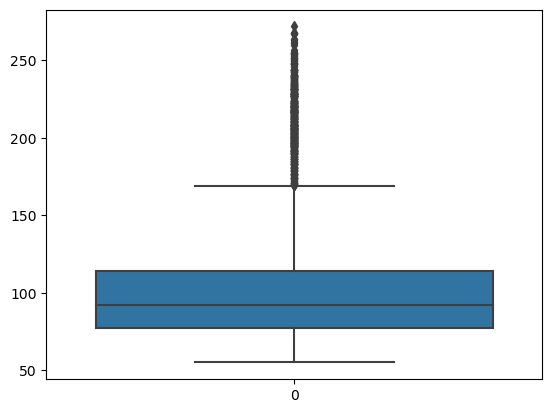

In [30]:
sns.boxplot(data['avg_glucose_level'])

##### we can see that avg_glucose_level has outliers

In [31]:
#Removing the outliers
q1=data['avg_glucose_level'].quantile(0.25)
q3=data['avg_glucose_level'].quantile(0.75)
IQR=q3-q1

In [32]:
q1,q3,IQR

(77.235, 114.09, 36.855000000000004)

In [33]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(21.952499999999993, 169.3725)

In [34]:
data.loc[(data['avg_glucose_level']> upper_limit) | (data['avg_glucose_level']< lower_limit)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,1,41.0,0,0,1,Private,1,223.78,32.300000,never smoked,0
5062,0,82.0,0,0,1,Self-employed,0,211.58,36.900000,never smoked,0
5063,1,39.0,0,0,1,Private,1,179.38,27.700000,Unknown,0
5064,1,70.0,0,0,1,Self-employed,0,193.88,24.300000,Unknown,0


In [35]:
data=data.copy()
data.loc[(data['avg_glucose_level']>upper_limit), 'avg_glucose_level']=upper_limit
data.loc[(data['avg_glucose_level']<lower_limit), 'avg_glucose_level']=lower_limit

<Axes: >

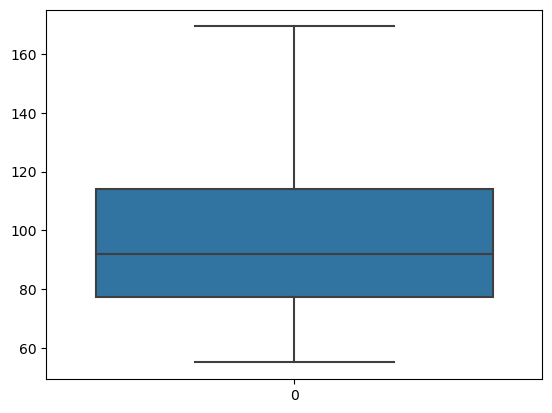

In [36]:
sns.boxplot(data['avg_glucose_level'])

#### We have successfully removed the outliers

<Axes: >

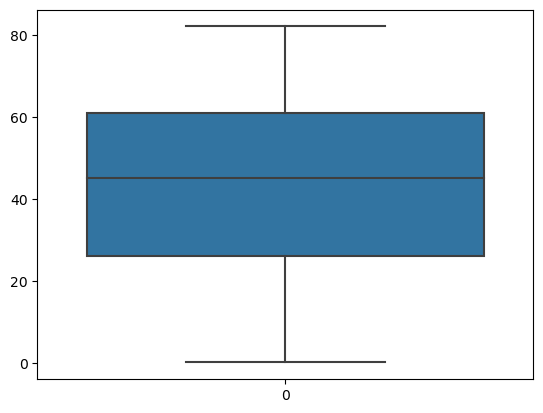

In [79]:
sns.boxplot(data["age"])

##### We can see that age has no outliers

In [38]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.413603,43.346963,0.097897,0.054256,0.659131,0.507372,101.011153,28.908992,0.048948
std,0.492527,22.591698,0.297204,0.226544,0.474048,0.499995,33.235547,7.696868,0.215781
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,77.235000,23.800000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.890000,28.400000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,169.372500,97.600000,1.000000


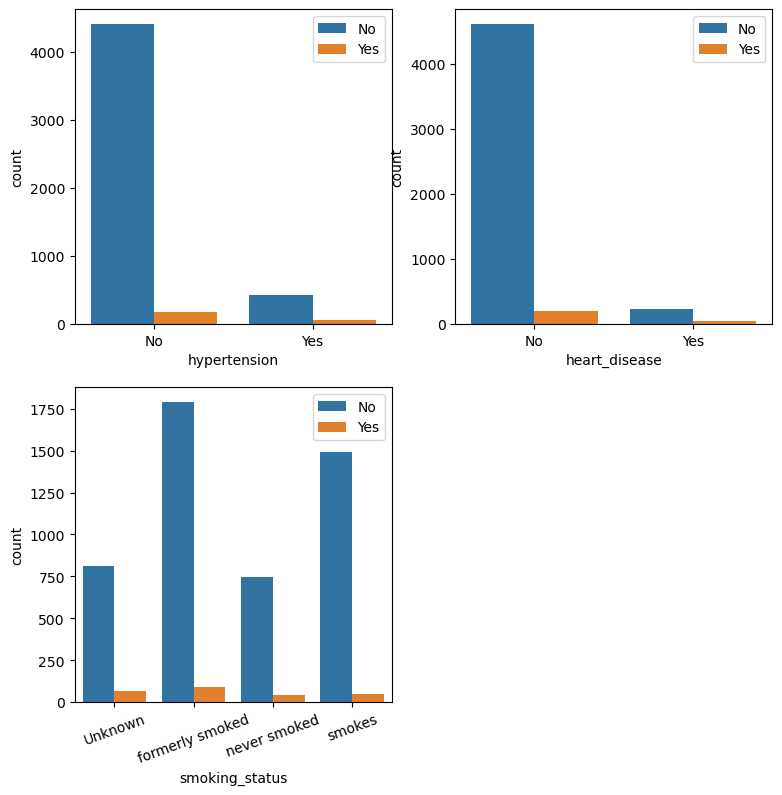

In [39]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)           
sns.countplot(x='hypertension',hue='stroke',data=data)
plt.xticks([0,1],['No','Yes'])
plt.legend(labels=['No','Yes'])
plt.subplot(2,2,2)           
sns.countplot(x='heart_disease',hue='stroke',data=data)
plt.xticks([0,1],['No','Yes'])
plt.legend(labels=['No','Yes'])
plt.subplot(2,2,3)           
sns.countplot(x='smoking_status',hue='stroke',data=data)
plt.xticks([0,1,2,3],['Unknown','formerly smoked','never smoked','smokes'])
plt.legend(labels=['No','Yes'])
plt.xticks(rotation=20)
plt.show()

#### We can see that around 100 patients with no hypertension have stroke whereas arounf 10 patients with hypertension have stroke

#### We can also see that the formerly smokers category has the highest number of stroke patients

<Axes: xlabel='stroke', ylabel='bmi'>

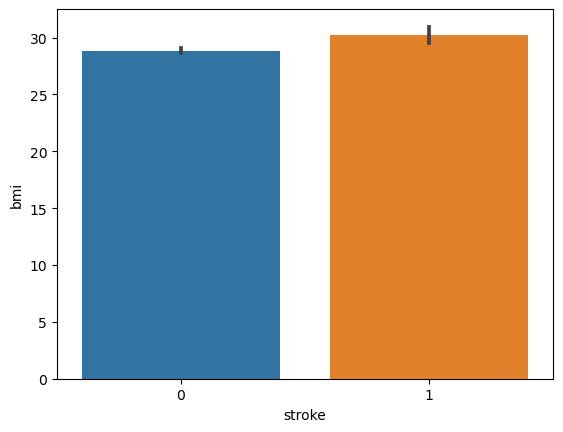

In [40]:
sns.barplot(x='stroke',y='bmi',data=data)

#### Here we can infer that the average bmi of non-stroke patients lies between 25-30 whereas the bmi of patients having stroke is 30 or above

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

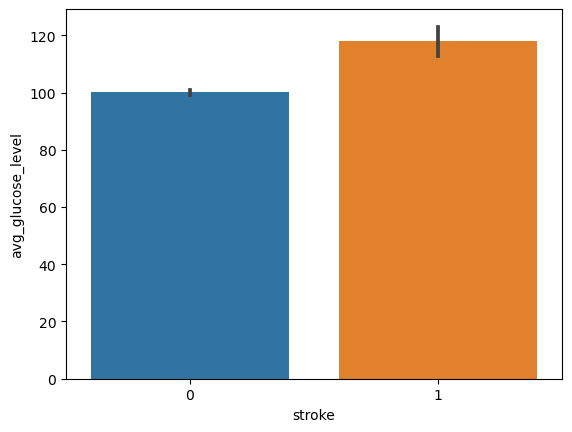

In [41]:
sns.barplot(x='stroke',y='avg_glucose_level',data=data)

#### We can see that the average glucose level of non-stroke patients is 100 and the same for stroke patients is around 120 

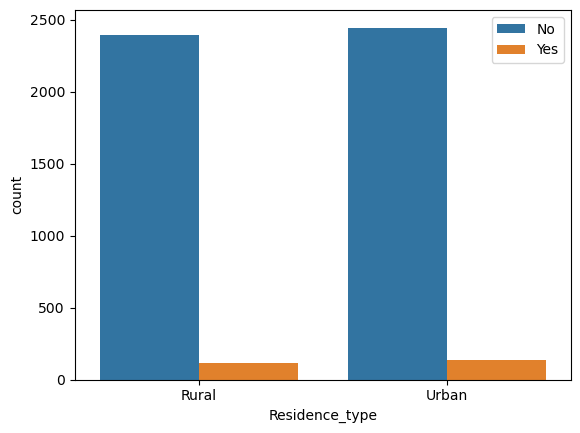

In [42]:
sns.countplot(x=data["Residence_type"], hue=data['stroke'])
plt.xticks([0,1],['Rural','Urban'])
plt.legend(labels=['No','Yes'])
plt.show()

#### We can infer that the patinets residing in urban areas have high strokes in comparison with the patients in rural areas 

C:\Users\SIMRAN SHAIKH\AppData\Local\Temp\ipykernel_15256\3402667012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]["age"], color='green', label='No Stroke')
C:\Users\SIMRAN SHAIKH\AppData\Local\Temp\ipykernel_15256\3402667012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

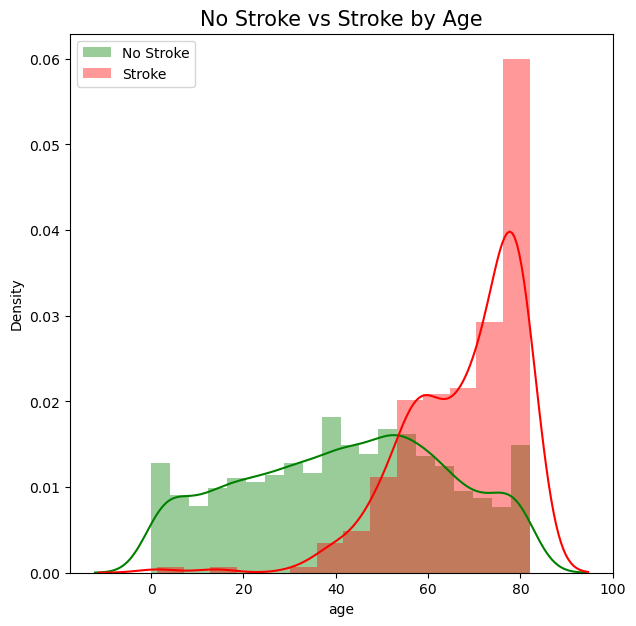

In [43]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['stroke'] == 0]["age"], color='green', label='No Stroke')
sns.distplot(data[data['stroke'] == 1]["age"], color='red', label='Stroke')
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.legend()
plt.show()

#### Here we can clearly see that most of the patients who don't have stroke lie in the age between 0-55 whereas the patients having stroke lie in the age between 55-80. We can infer that old aged people are lokely to get srtoke 

#### Encoding the features having more than 2 categories

In [44]:
smoke_stat=pd.get_dummies(data["smoking_status"],drop_first=True)

In [45]:
work_stat=pd.get_dummies(data["work_type"],drop_first=True)

In [46]:
data=pd.concat([data,smoke_stat,work_stat],axis=1)

In [47]:
data.drop(["work_type","smoking_status"],axis=1,inplace=True)

In [48]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Private,Self-employed,children
0,1,67.0,0,1,1,1,169.3725,36.600000,1,True,False,False,True,False,False
1,0,61.0,0,0,1,0,169.3725,28.893237,1,False,True,False,False,True,False
2,1,80.0,0,1,1,0,105.9200,32.500000,1,False,True,False,True,False,False
3,0,49.0,0,0,1,1,169.3725,34.400000,1,False,False,True,True,False,False
4,0,79.0,1,0,1,0,169.3725,24.000000,1,False,True,False,False,True,False


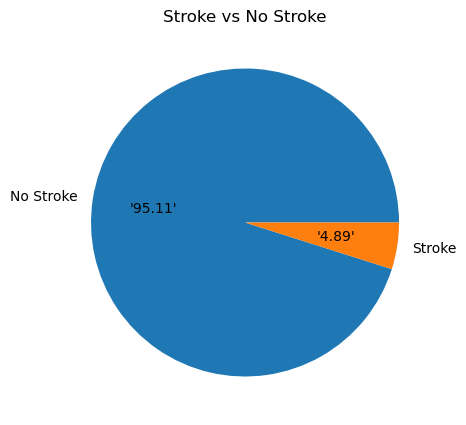

In [49]:
plt.figure(figsize=(8,5))
plt.title('Stroke vs No Stroke')
plt.pie(data['stroke'].value_counts(),labels=["No Stroke",'Stroke'],autopct="'%.2f'")
plt.show()

#### Here we can infer that our data has 95% non-stroke patients and only 5% stroke patients which means our data is imbalanced and will create biasness in predicting the stroke. We need to use sampling techniques to balance the data

#### Creating the oversamping data

In [50]:
count_class_0,count_class_1=data.stroke.value_counts()
df_class_0=data[data["stroke"]==0]
df_class_1=data[data["stroke"]==1]

In [51]:
count_class_0,count_class_1

(4838, 249)

In [52]:
df_class_0.shape

(4838, 15)

In [53]:
df_class_1.shape

(249, 15)

#### Here we can see that there are only 249 stroke patients and 4838 non stroke patients 

In [54]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [55]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.stroke.value_counts()

stroke
0    4838
1    4838
Name: count, dtype: int64

#### Here we have overcome the imbalanced data condition by oversampling and now we have equal number of stroke and non-stroke patients

### Building the model with the oversamped data

In [56]:
x=df_test_over.drop("stroke",axis=1)
y=df_test_over['stroke']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 1) Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_test)

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Printing classification report

In [61]:
from sklearn.metrics import classification_report,accuracy_score

In [62]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1462
           1       0.75      0.82      0.79      1441

    accuracy                           0.78      2903
   macro avg       0.78      0.78      0.78      2903
weighted avg       0.78      0.78      0.78      2903



In [63]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(logreg, x, y, cv=5)
print("Average Accuracy:{:.2f}%".format((sum(score1)/len(score1))*100))

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Average Accuracy:77.65%


C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Printing the confusion matrix

In [64]:
from sklearn import metrics

In [65]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred1)
cf_matrix

array([[1067,  395],
       [ 254, 1187]], dtype=int64)

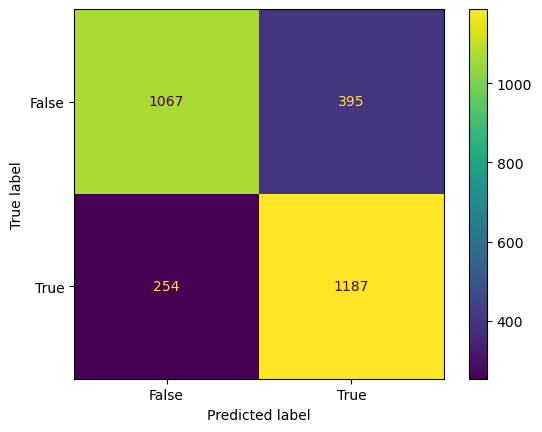

In [66]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 2) Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train, y_train)
y_pred2 = treemodel.predict(x_test)

In [69]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1462
           1       0.95      1.00      0.97      1441

    accuracy                           0.97      2903
   macro avg       0.97      0.97      0.97      2903
weighted avg       0.97      0.97      0.97      2903



In [70]:
score2 = cross_val_score(treemodel, x, y, cv=5)
print("Average Accuracy:{:.2f}%".format((sum(score2)/len(score2))*100))

Average Accuracy:97.37%


In [71]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred2)
cf_matrix

array([[1385,   77],
       [   0, 1441]], dtype=int64)

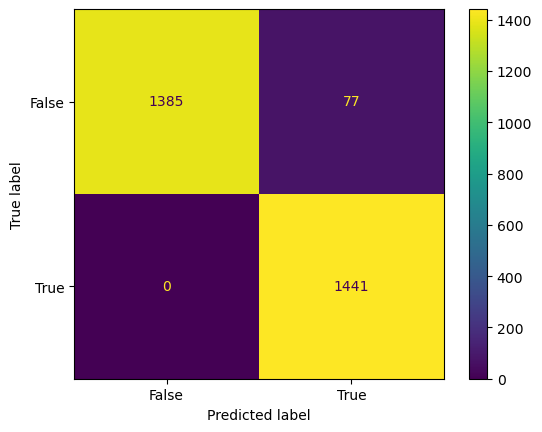

In [72]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 3) Support Vector Machine

In [73]:
from sklearn.svm import SVC

In [74]:
svmodel=SVC()
svmodel.fit(x_train,y_train)
y_pred3=svmodel.predict(x_test)

In [75]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1462
           1       0.73      0.84      0.78      1441

    accuracy                           0.76      2903
   macro avg       0.77      0.76      0.76      2903
weighted avg       0.77      0.76      0.76      2903



In [76]:
score3 = cross_val_score(svmodel, x, y, cv=5)
print("Average Accuracy:{:.2f}%".format((sum(score3)/len(score3))*100))

Average Accuracy:76.66%


In [77]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred3)
cf_matrix

array([[1008,  454],
       [ 235, 1206]], dtype=int64)

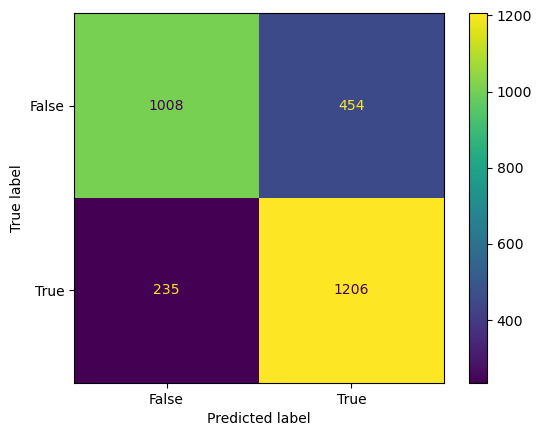

In [78]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()